In [40]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils.np_utils import  to_categorical

from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint


 Carrega os dados do dataset Fashion MINST

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
labels = [ 'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'  ]

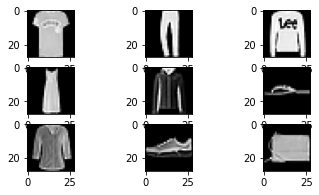

In [6]:
classes = set(y_test)

plt.figure(0)
for c in classes:  
  idx =  np.where(y_test == c) 
  if c + 1 == 10:
    break  
  plt.subplot(430 + 1 + c)
  plt.imshow(X_test[idx[0][0]], cmap=plt.get_cmap('gray'))

plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

Normalização das imagens

Cada pixel será dividido por 255

In [8]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Aplicando one-hot encoding aos rótulos

In [9]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
X_train.shape

(60000, 28, 28)

In [48]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_train.shape, X_test.shape
y_train.shape, y_test.shape, X_train[0].shape

((60000, 10), (10000, 10), (28, 28, 1))

Arquitetura do Modelo:

In [53]:
letnet_model = Sequential()
letnet_model.add(Conv2D(filters=6, kernel_size=(5,5),  activation='relu', input_shape=(X_train[0].shape)))    
letnet_model.add(Conv2D(filters=32, kernel_size=(5,5),  activation='relu'))   
letnet_model.add(Dropout(0.2))
letnet_model.add(MaxPooling2D(pool_size=2)) 

letnet_model.add(Conv2D(filters=128, kernel_size=(5,5),  activation='relu'))                        
letnet_model.add(Flatten())

letnet_model.add(Dense(84, activation='relu'))
letnet_model.add(Dense(num_classes, activation='softmax'))

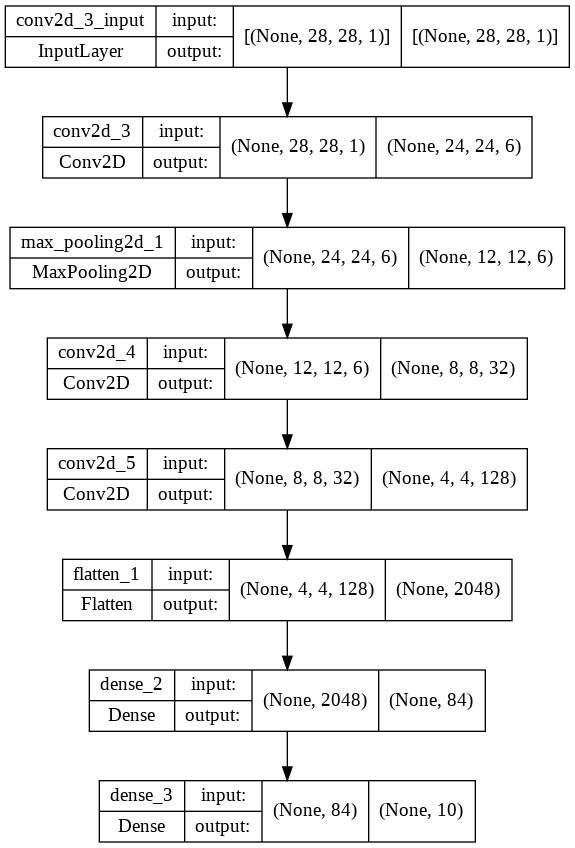

In [18]:
plot_model(letnet_model, to_file='lenet5.png', show_shapes=True, show_layer_names=True)


Para a construção da LETNET5 eu me baseei nesse artigo: https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

In [56]:
letnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelofashion-lenet5.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

hist = letnet_model.fit(X_train, y_train, batch_size=500,  epochs=15,  validation_data=(X_test,y_test), callbacks=[checkpointer], verbose=1, shuffle=True)


Epoch 1/15
117/120 [============================>.] - ETA: 0s - loss: 0.7481 - accuracy: 0.7266
Epoch 1: val_accuracy improved from -inf to 0.81040, saving model to /content/drive/My Drive/modelofashion-lenet5.hdf5
120/120 [==============================] - 4s 19ms/step - loss: 0.7416 - accuracy: 0.7289 - val_loss: 0.5348 - val_accuracy: 0.8104
Epoch 2/15
117/120 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.8364
Epoch 2: val_accuracy improved from 0.81040 to 0.84560, saving model to /content/drive/My Drive/modelofashion-lenet5.hdf5
120/120 [==============================] - 2s 16ms/step - loss: 0.4446 - accuracy: 0.8365 - val_loss: 0.4405 - val_accuracy: 0.8456
Epoch 3/15
117/120 [============================>.] - ETA: 0s - loss: 0.3654 - accuracy: 0.8688
Epoch 3: val_accuracy improved from 0.84560 to 0.86910, saving model to /content/drive/My Drive/modelofashion-lenet5.hdf5
120/120 [==============================] - 2s 16ms/step - loss: 0.3650 - accuracy: 0.

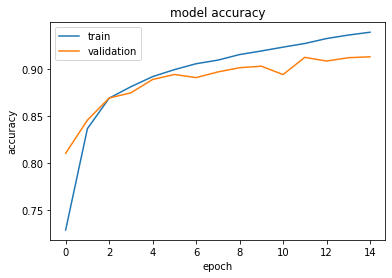

In [58]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

A acurácia de treino e teste seguem em uma linha similar